# Support Vector Machine 실습

---

In [2]:
#! pip install mglearn

In [14]:
%matplotlib inline

from sklearn.datasets import make_blobs
import mglearn
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV,train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.cm as cm

import warnings
warnings.simplefilter("ignore", UserWarning)

---

# Two-dimensional classification

## 다 범주데이터를 시각화와 이해를 위해 2진분류 데이터로 만들어 보겠습니다.

y: [1 0 1 1 1 0]


Text(0, 0.5, 'Attribute 1')

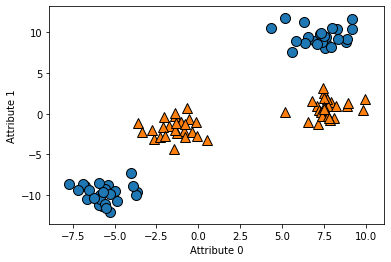

In [15]:
# 비선형 데이터
X, y = make_blobs(centers=4, random_state=8)

y = y % 2
print('y:', y[0:6])

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Attribute 0")
plt.ylabel("Attribute 1")

## 주어진 데이터에 가장 단순한 linear SVM을 사용해보도록 하겠습니다.

In [16]:
# 선형 SVM을 통한 모형 적합
from sklearn.svm import LinearSVC
model = LinearSVC()
linear_svm = model.fit(X, y)

In [17]:
linear_svm

LinearSVC()

Text(0, 0.5, 'Attribute 1')

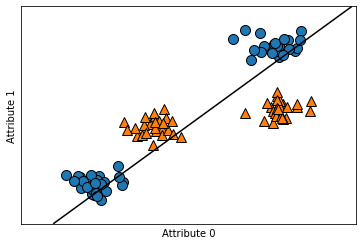

In [18]:
mglearn.plots.plot_2d_separator(classifier=linear_svm, X=X) # black line
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) # data point
plt.xlabel("Attribute 0")
plt.ylabel("Attribute 1")

## 두 범주를 정확하게 분류시키지 못했습니다...
## 그러나, 모델의 예측성능을 올리는 하나의 방법으로 **데이터를 고차원으로 맵핑**하는 대안이 있습니다.

---

# Three-dimensional classification


## 선형 분류가 불가능한 데이터에서 x의 두번째 변수를 제곱한 변수를 추가하여 3차원으로 확장시키어 보도록하겠습니다.

In [19]:
print('Before X:', X[0:6])

Before X: [[-1.72161036 -1.48033142]
 [-3.6573384  -9.5482383 ]
 [ 7.0778163   0.99508772]
 [-1.36579859 -0.3148625 ]
 [-2.66521206 -3.12591651]
 [ 7.63027116  8.69797933]]


In [20]:
# 두 번째 변수를 제곱하여 추가합니다
X_new = np.concatenate([X, X[:, 1:] ** 2], axis=1)
print('After X:', X_new[0:6])

After X: [[-1.72161036 -1.48033142  2.19138111]
 [-3.6573384  -9.5482383  91.16885455]
 [ 7.0778163   0.99508772  0.99019957]
 [-1.36579859 -0.3148625   0.09913839]
 [-2.66521206 -3.12591651  9.77135405]
 [ 7.63027116  8.69797933 75.65484441]]


In [21]:
# 각 클래스마다 다른 색깔을 입히기 위해 selection_idx 정의
selection_idx = y == 0
selection_idx

array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False])

In [22]:
~selection_idx

array([ True, False,  True,  True,  True, False, False,  True,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True, False, False,  True, False, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True, False, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True, False, False,  True, False,
       False,  True, False, False,  True, False,  True,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True])

Text(0.5, 0, '(Attribute 1)^2')

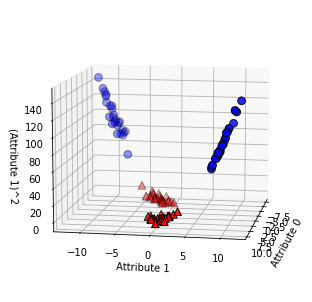

In [23]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
# elev: Elevation viewing angle
# azim: Azimuthal viewing angle
ax = Axes3D(figure, elev=10, azim=10)

# {c: color, marker: marker type, s: maker size}
ax.scatter(X_new[selection_idx, 0], X_new[selection_idx, 1], X_new[selection_idx, 2], c='b',marker='o', s=60, edgecolor='k')
ax.scatter(X_new[~selection_idx, 0], X_new[~selection_idx, 1], X_new[~selection_idx, 2], c='r', marker='^', s=60, edgecolor='k')
ax.set_xlabel("Attribute 0")
ax.set_ylabel("Attribute 1")
ax.set_zlabel("(Attribute 1)^2")

# **선형 SVM을 통한 모델 적합**

## - 선형 분류가 불가능한 데이터에서 x의 제곱 변수를 추가하여 3차원으로 확장
## - Linear SVM을 통한 분류가 가능함을 분류경계면 시각화를 통해서 확인

$ g(\textbf{x}) = w_1^Tx_1 + w_2^Tx_2 + w_3^Tx_3 +b$

In [24]:
# 3D 선형 SVM 모형 적합
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

In [25]:
print('coef: ', coef)
print('intercept: ',intercept)

coef:  [ 0.11500463 -0.19321964 -0.05182733]
intercept:  [1.15248081]


$ -w_3^Tx_3 = w_1^Tx_1 + w_2^Tx_2  +b$

$x_3 = (w_1^Tx_1 + w_2^Tx_2  +b) \div -w_3$

Text(0.5, 0, '(Attribute 1)^2')

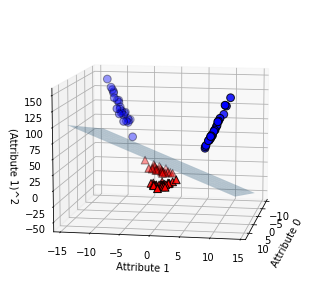

In [26]:
# 선형 초평면 그리기
figure = plt.figure()
# elev: Elevation viewing angle
# azim: Azimuthal viewing angle
ax = Axes3D(figure, elev=10, azim=10)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

# (row stride, col stride): plot sample size 
# alpha: hyperplane shade
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# {c: color, marker: marker type, s: maker size}
ax.scatter(X_new[selection_idx, 0], X_new[selection_idx, 1], X_new[selection_idx, 2], c='b',marker='o', s=60, edgecolor='k')
ax.scatter(X_new[~selection_idx, 0], X_new[~selection_idx, 1], X_new[~selection_idx, 2], c='r', marker='^', s=60, edgecolor='k')
ax.set_xlabel("Attribute 0")
ax.set_ylabel("Attribute 1")
ax.set_zlabel("(Attribute 1)^2")

---